## Sobre os Dados

Para a construção do modelo de será usado o banco de dados WESAD (Wearable Stress and Affect Detection), disponibilizado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/WESAD+%28Wearable+Stress+and+Affect+Detection%29).

Os dados que serão utilizados nesta análise também estão disponíveis para download por meio [deste link direto](https://uni-siegen.sciebo.de/s/pYjSgfOVs6Ntahr/download),conjunto de dados é coletado de 17 assuntos diferentes, mas os sensores em 2 assuntos estavam com defeito, portanto, os dados de S1 e S12 estão ausentes. Portanto, o conjunto de dados WESAD tem 15 pastas a saber, S1 a S17 onde cada um corresponde a um assunto, cada pasta tem 5 arquivos, dos quais apenas os arquivos .pkl são de interesse, uma vez que contêm dados combinados de todos 10 sensores.

Os testes a seguir serão realizados com um dos sujeitos estudafos, abaixo há os detalhes do sujeito disponilizados: 
*   Idade: 27
*   Altura: 1,75
*   Peso: 80kg
*   Sexo:  Masculino
*   Mão Dominante: Direita[texto do link](https://)



In [1]:
import sys
print(sys.version)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importar os pacotes necessários
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
pickle.HIGHEST_PROTOCOL
import seaborn as sns
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.impute import SimpleImputer

# configurar o notebook
#sns.set_style()

# Importar os Dados

In [4]:
#carregando o dataset
data_set = '/content/drive/My Drive/WESAD/'
s2_path = data_set + 'S2.pkl'
#modificação necessária pois os dados estavam em py2 e o ambiente usa py3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

## Análise Exploratória

A primeira coisa que faremos após importar o dataset será identificar as informações contidas no dataset. 
A primeira coisa que faremos após importar o dataset será identificar as informações contidas no dataset. 

Na sequência será feito uma contagem dos dados disponilizados de cada entrada disponibilizada por sensor. 

Por fim, considerando o estudo do[ WESAD](https://dl.acm.org/doi/10.1145/3242969.3242985) será verificado o valor mínimo e o valor máximo dos identificadores. Conforme o estudo- 'Rótulo': ID da respectiva condição do protocolo de estudo, amostrado em 700 Hz. Os seguintes IDs são fornecidos: 0 = não definido / transiente, 1 = linha de base, 2 = estresse, 3 = diversão, 4 = meditação, 5/6/7 = deve ser ignorado neste conjunto de dados

* A descrição completa para cada uma das *features* está disponível [neste link](https://archive.ics.uci.edu/ml/datasets/WESAD+%28Wearable+Stress+and+Affect+Detection%29).



In [5]:
count=len(s2_data['label'])
print('Sujeito', s2_data['subject'])
print('labels array', (s2_data['label']))
print('sinal', s2_data['signal'])
print('len(labels array)=',count)

Sujeito S2
labels array [0 0 0 ... 0 0 0]
sinal {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.148

In [6]:
#definindo dados
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]
w_label=s2_data['label']

In [7]:
%matplotlib inline
print("c_ax",len(c_ax))
print("c_ay",len(c_ay))
print("c_az",len(c_az))
print("c_ecg",len(c_ecg))
print("c_emg",len(c_emg))
print("c_eda",len(c_eda))
print("c_temp",len(c_temp))
print("c_resp",len(c_resp))
print("w_ax",len(w_ax))
print("w_ay",len(w_ay))
print("w_az",len(w_az))
print("w_bvp",len(w_bvp))
print("w_eda",len(w_eda))
print("w_temp",len(w_temp))
print(w_label, len(w_label))
print("Minimo valor contido no label é:", min(w_label), "Máximo valor contido no label é:",max(w_label))

c_ax 4255300
c_ay 4255300
c_az 4255300
c_ecg 4255300
c_emg 4255300
c_eda 4255300
c_temp 4255300
c_resp 4255300
w_ax 194528
w_ay 194528
w_az 194528
w_bvp 389056
w_eda 24316
w_temp 24316
[0 0 0 ... 0 0 0] 4255300
Minimo valor contido no label é: 0 Máximo valor contido no label é: 7


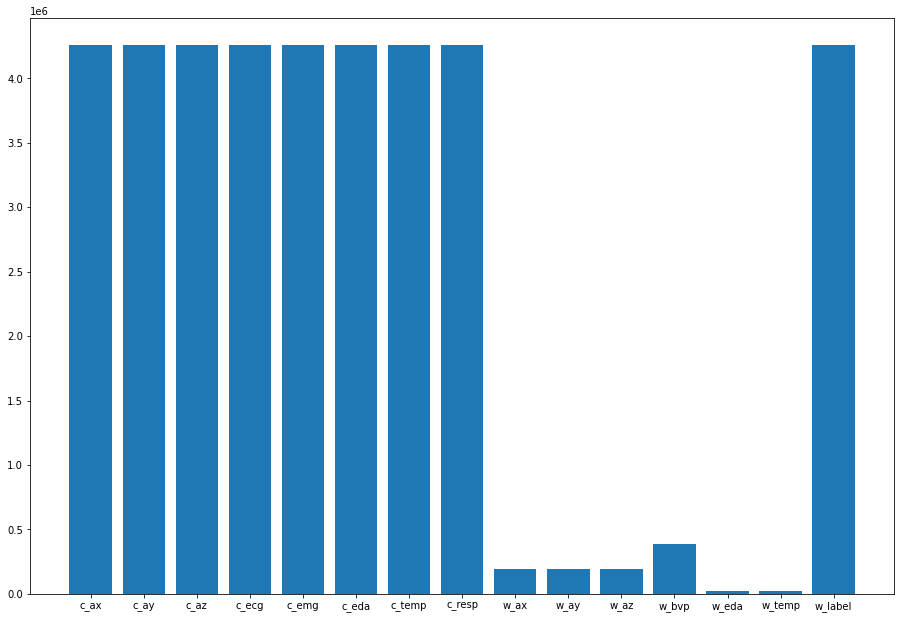

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","w_label"]
y_ax =  [len(c_ax),len(c_ay),len(c_az),len(c_ecg),len(c_emg),len(c_eda),len(c_temp),len(c_resp),len(w_ax),len(w_ay),len(w_az),len(w_bvp),len(w_eda),len(w_temp),len(w_label)]
ax.bar(langs,y_ax)

plt.show()
plt.savefig('f2.png',dpi=100)

#Contagem e definição de Rótulos oferecidos pelo DataSet

Há um desbalanceamenro nos valores oferecidos da variável alvo. Portanto uma matriz de confusão para validar em casos de falsos positivos


baseline_indices 800800
stress_indices 430500
amusement_indices 253400
meditation_indices 537599


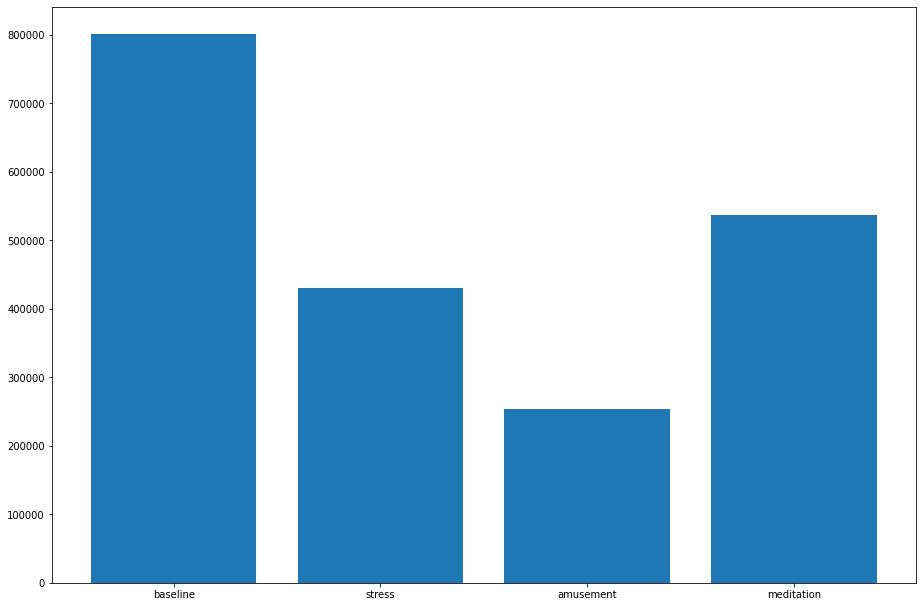

In [9]:
baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]

print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))

#plotando em gráfico
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement","meditation"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices)]
ax.bar(langs,y_ax)
fig.savefig('f1.png')
plt.show()


Definindo a média e a mediana dos rótulos a serem usados no treinamento, sendo 0 neutro(baseline) e 1 estresse (stress)

In [10]:
base_mean = np.mean(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_mean = np.mean(s2_data['signal']['chest']['EDA'][stress_indices])

print('base média:\t', base_mean, '\nstress media:\t', stress_mean, '\n diferença:\t', abs(base_mean - stress_mean))
print('\n-')


base_median = np.median(s2_data['signal']['chest']['EMG'][baseline_indices])
stress_median = np.median(s2_data['signal']['chest']['EMG'][stress_indices])

print('base mediana:\t', base_median , '\nstress mediana:\t', stress_median, '\ndiferença:\t', abs(base_median  - stress_median))
print('\n-')

base_min = np.min(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_min = np.min(s2_data['signal']['chest']['EDA'][stress_indices])

print('base minimo:\t', base_min, '\nstress minimo:\t', stress_min, '\ndiferença:\t', abs(base_min - stress_min))
print('\n-')

base_max = np.max(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_max = np.max(s2_data['signal']['chest']['EDA'][stress_indices])

print('base maximo:\t', base_max , '\nstress maximo:\t', stress_max, '\ndiferença:\t', abs(base_max  - stress_max))
print('\n-')

base média:	 2.0565166763968756 
stress media:	 1.796925323876216 
 diferença:	 0.2595913525206597

-
base mediana:	 -0.0019683837890625 
stress mediana:	 -0.0017852783203125 
diferença:	 0.00018310546875

-
base minimo:	 0.913238525390625 
stress minimo:	 0.968170166015625 
diferença:	 0.054931640625

-
base maximo:	 5.7567596435546875 
stress maximo:	 3.4427642822265625 
diferença:	 2.313995361328125

-


# Convertendo dicionário de pickle em quadro de dados do Pandas

Tendo verificado o número de dados, nota-se que o número de dados presentes nos dispositivos de peito estão completos, enquanto o número presente no conjunto de dados de pulso estão defasados.

Sendo 4255300 amostras coletadas do dispositivo respiban (peito), enquanto há apenas 194528 amostras coletadas do
dispositivo empática (pulso), dessa forma para o estudo será considerado os dados Respibiam devido ao número de dados. Para novos testes os dados de dicionário pickle serão convertidos em um quadro de dados do Pandas para novas validações.

In [11]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combinado")

data frame combinado


In [12]:
# dimensões do df
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		4255300
Colunas:	9


In [13]:
# ver as 5 primeiras entradas
df.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0


Por meio do método describe, é possível ver um resumo estatístico das variáveis numéricas.

In [14]:
df.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06
mean,7.538656e-01,-1.331884e-01,-4.226812e-01,1.212245e-03,-2.412918e-03,1.528387e+00,3.087668e+01,5.490614e-02,1.212370e+00
std,1.751162e-01,6.417297e-02,3.002357e-01,1.540773e-01,1.165187e-02,1.238425e+00,1.281106e+00,2.917749e+00,1.606596e+00
min,2.150000e-01,-6.600000e-01,-1.135400e+00,-1.499542e+00,-4.149628e-01,2.632141e-01,2.804526e+01,-2.790375e+01,0.000000e+00
25%,6.210001e-01,-1.498000e-01,-7.172000e-01,-6.797791e-02,-8.331299e-03,7.995605e-01,3.057495e+01,-1.481628e+00,0.000000e+00
50%,8.568000e-01,-1.256000e-01,-3.222000e-01,8.239746e-03,-1.602173e-03,1.163101e+00,3.128992e+01,-1.571655e-01,0.000000e+00
75%,8.922000e-01,-9.579998e-02,-2.098000e-01,4.435730e-02,3.982544e-03,1.546478e+00,3.181512e+01,1.618958e+00,2.000000e+00
max,2.029800e+00,5.390000e-01,1.246800e+00,1.499313e+00,3.009796e-01,7.576752e+00,3.437039e+01,2.737885e+01,7.000000e+00


Verificando tipo numérico dos dados, todos os dados são do tipo float

In [15]:
df.dtypes

c_ax       float64
c_ay       float64
c_az       float64
c_ecg      float64
c_emg      float64
c_eda      float64
c_temp     float64
c_resp     float64
w_label    float64
dtype: object

Verificação da presença de valores ausentes no *dataset* 

In [16]:
df.isnull().sum()

c_ax       0
c_ay       0
c_az       0
c_ecg      0
c_emg      0
c_eda      0
c_temp     0
c_resp     0
w_label    0
dtype: int64

Verificar a quantidade de valores únicos 

In [17]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
w_label        7
c_ay        4156
c_temp      4220
c_emg       4324
c_ax        5808
c_az        8236
c_eda      18583
c_resp     26834
c_ecg      41266
dtype: int64


#Calculando e Removendo Outliers


In [18]:
print("shape",df.shape)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

shape (4255300, 9)
IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64
(2100456, 9)


# Histograma

Feito para avaliar a distribuição de dados

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


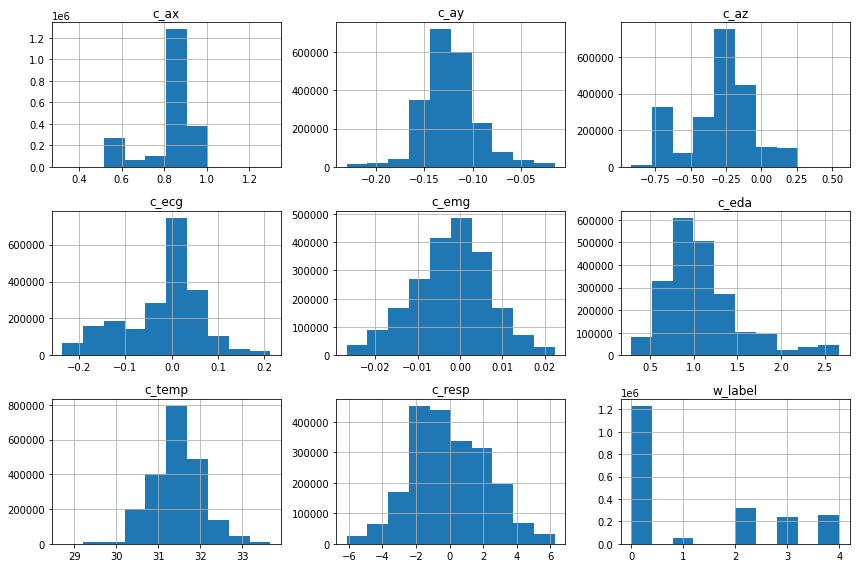

In [19]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(12,8))
df_out.hist(ax=ax)
plt.tight_layout()
plt.show()

O gráfico abaixo demostra uma correlação positiva, dessa forma possibilita uma aprendizagem supervisionada

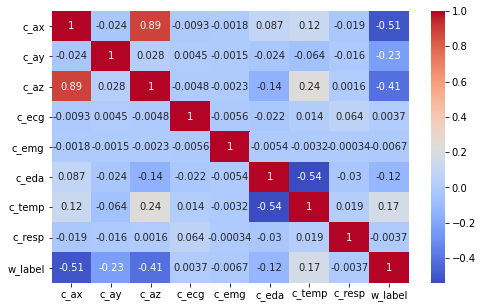

In [20]:
# plotar heatmap
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df_out.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

Fontes:

https://medium.com/@lucasoliveiras/primeiros-passos-com-kaggle-3871997b0868




https://python.docow.com/1124/matriz-de-correlacao-de-plotagem-usando-pandas.html


